In [1]:
using Statistics
using Plots
using Distributions
using NLopt
using JuMP
using BlackBoxOptim
using Suppressor
using DataFrames

# A. Dane:
1. Invest Bank (Wójcicki, B., & Migut, G. (2010). Wykorzystanie skoringu do przewidywania wyludzen w Invest Banku. In Skoring w Zarządzaniu Ryzykiem (pp. 47-57). Kraków: Statsoft.)

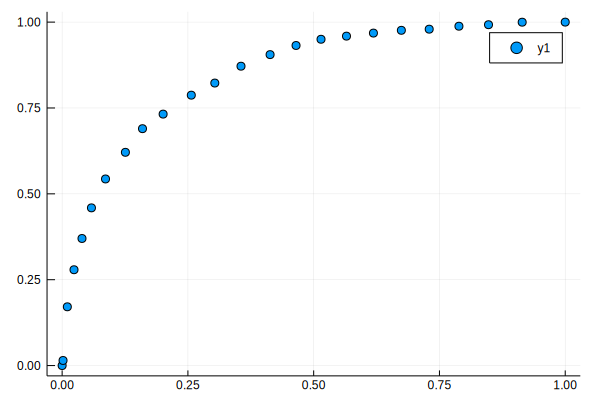

In [2]:
invest_x=[0, 0.00180075, 0.0103416, 0.0236013, 0.0394678, 0.0582724, 0.0862182, 0.125754, 0.159735, 0.200729, 0.256747, 0.303452, 0.35555, 0.413357, 0.464957, 0.514596, 0.565211, 0.618765, 0.674278, 0.729626, 0.788731, 0.847508, 0.914449, 1] 
invest_y=[0, 0.0148117, 0.171101, 0.279015, 0.370014, 0.45917, 0.543327, 0.620904, 0.68974, 0.732154, 0.7873, 0.82259, 0.871643, 0.905376, 0.931954, 0.950065, 0.959189, 0.968056, 0.976135, 0.979454, 0.988072, 0.992458, 0.999774, 1]
scatter(invest_x, invest_y)

2. Řezáč&Řezáč (Řezáč, M., & Řezáč, F. (2011). How to Measure the Quality of Credit Scoring Models. Czech Journal of Economics and Finance (Finance a Uver), 61(5), 486-507.)

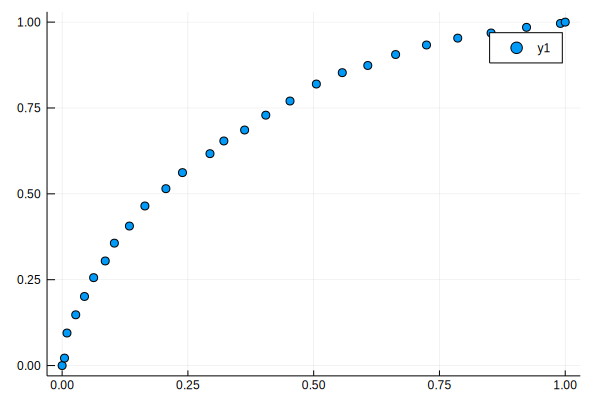

In [3]:
rezac_x=[0, 0.00468032, 0.00963357, 0.0270328, 0.0444337, 0.0626033, 0.0856843, 0.103838, 0.133772, 0.164513, 0.206242, 0.239203, 0.29389, 0.321474, 0.362724, 0.404795, 0.452942, 0.505316, 0.556843, 0.607544, 0.662868, 0.724255, 0.786363, 0.852627, 0.923084, 0.99047, 1] 
rezac_y=[0, 0.0217549, 0.0947614, 0.147811, 0.201159, 0.255997, 0.30458, 0.356439, 0.406218, 0.464639, 0.515022, 0.561823, 0.616981, 0.653946, 0.685854, 0.729085, 0.770234, 0.819729, 0.852835, 0.873723, 0.905639, 0.933388, 0.953389, 0.968327, 0.984757, 0.996121, 1]
scatter(rezac_x,rezac_y)

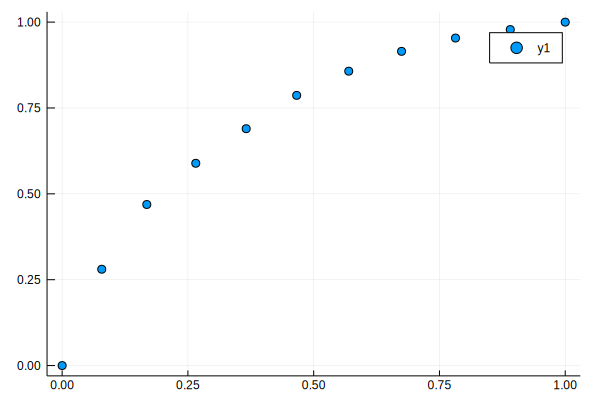

In [4]:
rezac2_x=[0, 0.0787195044874226, 0.168284666919479, 0.265630135254709, 0.365845025913285, 0.466198963468588, 0.569681456200227, 0.674668183541904, 0.781885981544685, 0.890766021994691, 1] 
rezac2_y=[0, 0.280469503698146, 0.468967735019831, 0.588969878872334, 0.689677350198306, 0.786686675956694, 0.857165826991103, 0.914889055632972, 0.953639189623754, 0.978347089720227, 1]
scatter(rezac2_x, rezac2_y)

3. Tobback (Tobback, E., & Martens, D. (2017). Retail credit scoring using fine-grained payment data. In Credit Scoring and Credit Control XV Conference - Presented Papers. Retrieved April 27, 2018, from https://www.business-school.ed.ac.uk/crc-conference/accepted-papers/

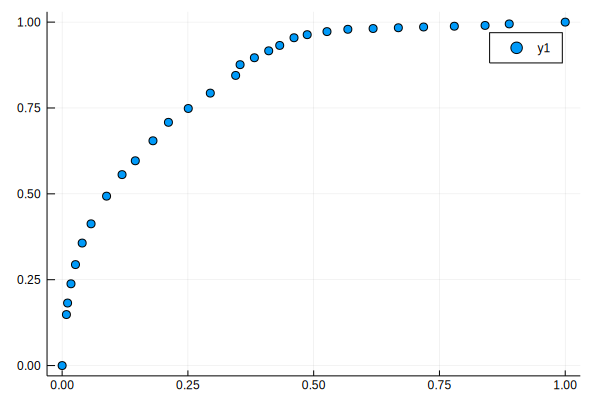

In [5]:
tobback_x=[0, 0.00853731343283581, 0.0108412483039348, 0.0175902306648574, 0.0265210312075983, 0.0398398914518317, 0.0574979647218452, 0.0883364993215739, 0.119109905020352, 0.145438263229308, 0.180559023066485, 0.211299864314789, 0.250719131614654, 0.294518317503392, 0.34488738127544, 0.353728629579376, 0.38216553595658, 0.410602442333785, 0.432477611940298, 0.460922659430122, 0.487137042062415, 0.526442333785617, 0.567921302578019, 0.618111261872456, 0.668301221166892, 0.718491180461329, 0.779590230664857, 0.840689280868385, 0.888705563093622, 1]
tobback_y=[0, 0.148507462686567, 0.182089552238805, 0.238059701492537, 0.294029850746268, 0.356716417910447, 0.412686567164179, 0.493283582089552, 0.555970149253731, 0.596268656716418, 0.654477611940298, 0.70820895522388, 0.748507462686567, 0.793283582089552, 0.844776119402985, 0.876119402985074, 0.896268656716418, 0.916417910447761, 0.932089552238806, 0.954477611940298, 0.963432835820895, 0.972388059701492, 0.97910447761194, 0.98134328358209, 0.983582089552239, 0.985820895522388, 0.988059701492537, 0.990298507462687, 0.994776119402985, 1]
scatter(tobback_x, tobback_y)

4. Coremetrix (Conolly, S. (2017). Personality and risk: a new chapter for credit assessment. In Credit Scoring and Credit Control XV Conference - Presented Papers. Retrieved April 27, 2018, from https://www.business-school.ed.ac.uk/crc-conference/accepted-papers/)

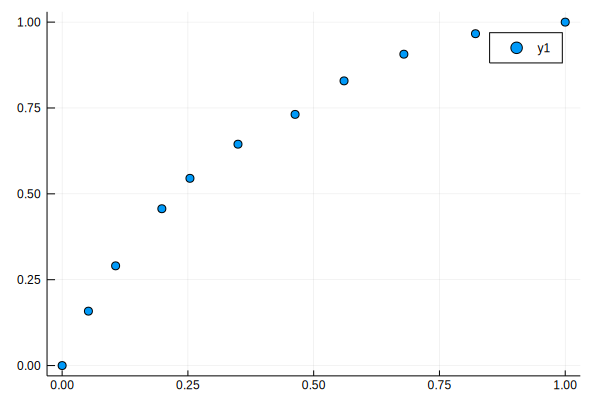

In [6]:
coremetrixa_x=[0, 0.0522522522522522, 0.106306306306306, 0.198198198198198, 0.254054054054054, 0.349549549549549, 0.463063063063063, 0.56036036036036, 0.679279279279279, 0.821621621621621, 1]
coremetrixa_y=[0, 0.158433734939758, 0.290361445783132, 0.456626506024096, 0.545180722891565, 0.644578313253011, 0.731325301204818, 0.828915662650601, 0.906626506024095, 0.966265060240963, 1]
scatter(coremetrixa_x, coremetrixa_y)

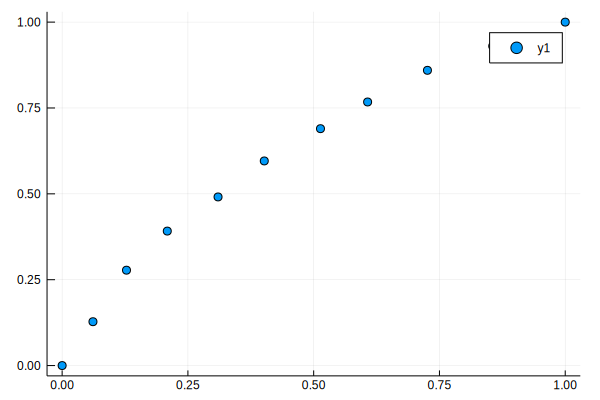

In [7]:
coremetrixb_x=[0, 0.0612612612612612, 0.127927927927927, 0.209009009009009, 0.30990990990991, 0.401801801801802, 0.513513513513513, 0.607207207207207, 0.726126126126126, 0.855855855855856, 1]
coremetrixb_y=[0, 0.127710843373493, 0.277710843373493, 0.39156626506024, 0.490963855421686, 0.59578313253012, 0.689759036144577, 0.767469879518071, 0.859638554216866, 0.93012048192771, 1]
scatter(coremetrixb_x, coremetrixb_y)

5. FICO (Jennings, A. (2015). Expanding the credit eligible population in the USA: A case study. In Credit Scoring and Credit Control XIV Conference - Conference Papers. Retrieved April 27, 2018, from https://www.business-school.ed.ac.uk/crc/category/conference-papers/2015/)

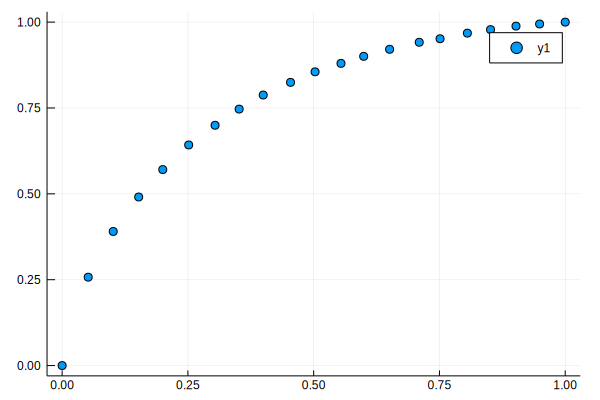

In [8]:
fico_x=[0, 0.0518404907975459, 0.101533742331288, 0.152147239263803, 0.199999999999999, 0.251533742331288, 0.303987730061349, 0.351840490797546, 0.399693251533742, 0.453987730061349, 0.502760736196319, 0.554294478527607, 0.599386503067484, 0.650920245398773, 0.709815950920245, 0.75122699386503, 0.805521472392638, 0.851533742331288, 0.902147239263803, 0.949079754601227, 1]
fico_y=[0, 0.257337883959044, 0.390443686006826, 0.490784982935153, 0.570648464163822, 0.642320819112628, 0.699658703071672, 0.746757679180887, 0.787713310580204, 0.82457337883959, 0.855290102389078, 0.879863481228669, 0.900341296928328, 0.920819112627986, 0.941296928327645, 0.951535836177474, 0.967918088737201, 0.978156996587031, 0.98839590443686, 0.994539249146758, 1]
scatter(fico_x, fico_y)

Poniższe dane to zanonimizowane dane pochodzące od różnych europejskich instytucji kredytowych. 

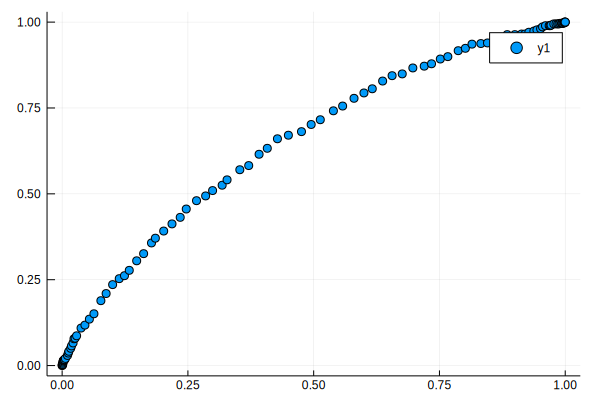

In [9]:
modelA1_x=[0, 0, 0.000679655641141822, 0.000906207521522429, 0.00113275940190304, 0.00135931128228364, 0.00158586316266425, 0.00226551880380607, 0.00249207068418668, 0.0031717263253285, 0.00453103760761214, 0.00498414136837336, 0.00657000453103761, 0.0106479383778885, 0.0122338015405528, 0.0133665609424558, 0.0169913910285455, 0.0185772541912098, 0.0217489805165383, 0.0235613955595831, 0.0258269143633892, 0.0287720888083371, 0.0376076121431808, 0.0453103760761214, 0.0541458994109651, 0.0632079746261894, 0.0770276393294064, 0.0874490258269144, 0.100362483008609, 0.113502492070684, 0.123923878568192, 0.133439057544178, 0.148164929768917, 0.161984594472134, 0.177616674218396, 0.185319438151337, 0.201857725419121, 0.218396012686905, 0.234707748074309, 0.246714997734481, 0.267104666968736, 0.285228817399184, 0.299048482102401, 0.318078840054372, 0.327820570910739, 0.353194381513367, 0.370865428183054, 0.391481649297689, 0.407793384685093, 0.427956502038967, 0.449705482555505, 0.475758948799275, 0.495015858631627, 0.513140009062075, 0.539193475305845, 0.557544177616674, 0.580199365654735, 0.599909379247848, 0.616447666515632, 0.637063887630267, 0.655867693701858, 0.676030811055732, 0.697100135931128, 0.719755323969189, 0.734254644313548, 0.751699139102855, 0.766651563207975, 0.78726778432261, 0.801540552786588, 0.814680561848663, 0.832351608518351, 0.845491617580426, 0.860444041685546, 0.870185772541912, 0.884685092886271, 0.899864068871772, 0.913230629814227, 0.920027186225646, 0.927729950158586, 0.937698232895333, 0.943815133665609, 0.951064793837789, 0.954916175804259, 0.960806524694155, 0.968056184866334, 0.97009515178976, 0.971907566832805, 0.977344811961939, 0.981649297689171, 0.98504757589488, 0.987539646579067, 0.989805165382873, 0.992750339827821, 0.993429995468962, 0.993883099229724, 0.995922066153149, 0.997734481196194, 0.998867240598097, 0.999093792478478, 0.999546896239239, 0.999773448119619, 1]
modelA1_y=[0, 0.00173310225303293, 0.00173310225303293, 0.00346620450606586, 0.00346620450606586, 0.00693240901213172, 0.0103986135181976, 0.0138648180242634, 0.0138648180242634, 0.0155979202772964, 0.0173310225303293, 0.0173310225303293, 0.0207972270363951, 0.0294627383015598, 0.0363951473136915, 0.0415944540727903, 0.0502599653379549, 0.0571923743500867, 0.0658578856152513, 0.0779896013864818, 0.0797227036395147, 0.0866551126516465, 0.109185441941075, 0.117850953206239, 0.135181975736568, 0.150779896013865, 0.188908145580589, 0.209705372616984, 0.235701906412478, 0.253032928942808, 0.261698440207972, 0.277296360485269, 0.305025996533795, 0.325823223570191, 0.357019064124783, 0.370883882149047, 0.391681109185442, 0.412478336221837, 0.431542461005199, 0.45580589254766, 0.480069324090121, 0.493934142114385, 0.509532062391681, 0.525129982668977, 0.540727902946274, 0.570190641247834, 0.582322357019064, 0.61525129982669, 0.632582322357019, 0.660311958405546, 0.670710571923744, 0.681109185441941, 0.701906412478336, 0.7157712305026, 0.741767764298094, 0.755632582322357, 0.778162911611785, 0.793760831889081, 0.805892547660312, 0.82842287694974, 0.844020797227036, 0.849220103986135, 0.866551126516464, 0.871750433275563, 0.878682842287695, 0.892547660311958, 0.89948006932409, 0.916811091854419, 0.923743500866551, 0.935875216637782, 0.937608318890815, 0.939341421143847, 0.948006932409012, 0.953206239168111, 0.963604852686308, 0.963604852686308, 0.965337954939341, 0.965337954939341, 0.97053726169844, 0.974003466204506, 0.977469670710572, 0.980935875216638, 0.986135181975737, 0.989601386481802, 0.989601386481802, 0.989601386481802, 0.991334488734835, 0.994800693240901, 0.994800693240901, 0.994800693240901, 0.994800693240901, 0.996533795493934, 0.996533795493934, 0.996533795493934, 0.996533795493934, 0.996533795493934, 0.998266897746967, 0.998266897746967, 1, 1, 1, 1]
scatter(modelA1_x, modelA1_y)

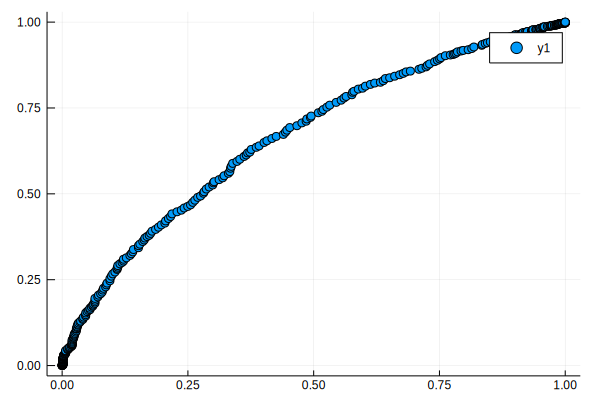

In [10]:
modelA2_y=[0, 0.000375445841937301, 0.000563168762905951, 0.000750891683874601, 0.000938614604843251, 0.00131406044678055, 0.0015017833677492, 0.0015017833677492, 0.00168950628871785, 0.00206495213065515, 0.00281584381452975, 0.0030035667354984, 0.00319128965646705, 0.0033790125774357, 0.00412990426131031, 0.00431762718227896, 0.00450535010324761, 0.00525624178712221, 0.00544396470809086, 0.00563168762905951, 0.00694574807584006, 0.00713347099680871, 0.00750891683874601, 0.00807208560165196, 0.00825980852262061, 0.00863525436455791, 0.00938614604843251, 0.00994931481133846, 0.0108879294161817, 0.0116388211000563, 0.011826544021025, 0.0135160503097428, 0.0152055565984607, 0.0161441712033039, 0.0168950628871785, 0.0176459545710531, 0.0182091233339591, 0.019335460859771, 0.0197109067017083, 0.0200863525436456, 0.0208372442275202, 0.0210249671484888, 0.0229021963581753, 0.0232776422001126, 0.0244039797259245, 0.0255303172517364, 0.0264689318565797, 0.0272198235404543, 0.0274075464614229, 0.0289093298291721, 0.0298479444340154, 0.0309742819598273, 0.0326637882485451, 0.0339778486953257, 0.0352919091421063, 0.0360428008259809, 0.038107752956636, 0.0399849821663225, 0.0405481509292285, 0.0428008259808523, 0.0435517176647269, 0.0465552844002253, 0.0471184531631312, 0.049371128214755, 0.0504974657405669, 0.0523746949502534, 0.0540642012389713, 0.0555659846067205, 0.0583818284212502, 0.0600713347099681, 0.0613853951567486, 0.0638257931293411, 0.064952130655153, 0.06814342031162, 0.0711469870471185, 0.0745259996245542, 0.0769663975971466, 0.0790313497278018, 0.0820349164633002, 0.0833489769100807, 0.0859770978036418, 0.0886052186972029, 0.0914210625117327, 0.0938614604843251, 0.0976159189036981, 0.101182654402103, 0.105875727426319, 0.107752956636005, 0.110944246292472, 0.113947813027971, 0.117702271447344, 0.120330392340905, 0.123897127839309, 0.126712971653839, 0.129528815468369, 0.134409611413554, 
        0.137600901070021, 0.141167636568425, 0.143983480382955, 0.148113384644265, 0.153181903510419, 0.15712408485076, 0.160503097428196, 0.16275577247982, 0.16688567674113, 0.170452412239534, 0.173268256054064, 0.176084099868594, 0.179087666604092, 0.181528064576685, 0.185470245917026, 0.190351041862211, 0.195607283649334, 0.199924910831613, 0.204993429697766, 0.209123333959076, 0.213816406983293, 0.219823540454289, 0.224892059320443, 0.229209686502722, 0.23502909705275, 0.240097615918904, 0.246855641073775, 0.253050497465741, 0.260371691383518, 0.266941993617421, 0.272385958325512, 0.279894875164258, 0.283086164820725, 0.286652900319129, 0.291158250422377, 0.29622676928853, 0.30035667354984, 0.304298854890182, 0.309555096677304, 0.313685000938615, 0.320630749014455, 0.325699267880608, 0.331143232588699, 0.33790125774357, 0.343157499530693, 0.349164633001689, 0.353482260183968, 0.361178899943683, 0.365684250046931, 0.37131593767599, 0.375633564858269, 0.379388023277642, 0.384831987985733, 0.391214567298667, 0.396470809085789, 0.402853388398723, 0.409611413553595, 0.414867655340717, 0.421250234653651, 0.428195982729491, 0.434015393279519, 0.441712033039234, 0.447719166510231, 0.452412239534447, 0.458794818847381, 0.463300168950629, 0.467993241974845, 0.475126712971654, 0.481509292284588, 0.489769100807209, 0.49371128214755, 0.501783367749202, 0.506100994931481, 0.513985357612164, 0.519992491083161, 0.525811901633189, 0.532006758025155, 0.535385770602591, 0.541392904073587, 0.54664914586071, 0.552656279331706, 0.559789750328515, 0.5646705462737, 0.574619861085038, 0.580063825793129, 0.588699080157687, 0.594330767786747, 0.600713347099681, 0.608785432701333, 0.61329078280458, 0.619297916275577, 0.621550591327201, 0.629247231086916, 0.635442087478881, 0.639571991740192, 0.64952130655153, 0.654402102496715, 0.661160127651586, 0.667167261122583, 0.672986671672611, 0.679744696827483, 
        0.685376384456542, 0.693073024216257, 0.698329266003379, 0.706589074526, 0.711469870471184, 0.718040172705087, 0.722545522808335, 0.726487704148677, 0.736061573118078, 0.740379200300357, 0.74544771916651, 0.75239346724235, 0.758212877792378, 0.76628496339403, 0.772667542706964, 0.779050122019899, 0.783555472123146, 0.788436268068331, 0.79556973906514, 0.798573305800638, 0.804955885113572, 0.807584006007133, 0.81359113947813, 0.818659658344284, 0.822601839684626, 0.824854514736249, 0.829359864839497, 0.835742444152431, 0.837995119204055, 0.842500469307302, 0.846818096489581, 0.850760277829923, 0.855077905012202, 0.857330580063826, 0.862586821850948, 0.865590388586446, 0.869720292847757, 0.874225642951004, 0.878355547212315, 0.884925849446217, 0.888868030786559, 0.892997935047869, 0.896752393467242, 0.902196358175333, 0.904261310305988, 0.905763093673738, 0.907828045804393, 0.909705275014079, 0.913459733433452, 0.915900131406045, 0.917589637694763, 0.919654589825418, 0.923033602402853, 0.927538952506101, 0.932419748451286, 0.935047869344847, 0.938051436080345, 0.940116388211001, 0.942744509104562, 0.945372629998123, 0.949127088417496, 0.950253425943308, 0.951567486390088, 0.951942932232026, 0.952130655152994, 0.953444715599775, 0.954195607283649, 0.954758776046555, 0.956260559414304, 0.957574619861085, 0.958888680307866, 0.960015017833677, 0.961141355359489, 0.962079969964333, 0.96245541580627, 0.963206307490145, 0.963394030411113, 0.963769476253051, 0.965458982541768, 0.966022151304674, 0.967336211751455, 0.968274826356298, 0.969588886803079, 0.970339778486953, 0.971090670170828, 0.971841561854702, 0.972404730617608, 0.97353106814342, 0.974094236906326, 0.974845128590201, 0.976159189036981, 0.976722357799887, 0.977285526562793, 0.977660972404731, 0.978036418246668, 0.978224141167637, 0.978787309930543, 0.978975032851511, 0.97916275577248, 0.98047681621926, 0.980664539140229, 
        0.981603153745072, 0.982166322507978, 0.982166322507978, 0.982917214191853, 0.983104937112821, 0.984231274638633, 0.984418997559602, 0.985545335085414, 0.985920780927351, 0.986671672611226, 0.987610287216069, 0.987985733058006, 0.988173455978975, 0.988736624741881, 0.989299793504787, 0.989675239346724, 0.989862962267693, 0.989862962267693, 0.990613853951568, 0.990801576872536, 0.991177022714473, 0.991364745635442, 0.991552468556411, 0.991740191477379, 0.991927914398348, 0.992491083161254, 0.99305425192416, 0.993617420687066, 0.993992866529003, 0.994180589449972, 0.99436831237094, 0.994743758212878, 0.994931481133846, 0.995682372817721, 0.995682372817721, 0.99587009573869, 0.996433264501596, 0.996433264501596, 0.996620987422564, 0.996808710343533, 0.996996433264502, 0.99718415618547, 0.997371879106439, 0.997559602027408, 0.997559602027408, 0.997747324948376, 0.997935047869345, 0.998122770790314, 0.998310493711282, 0.998498216632251, 0.998685939553219, 0.998873662474188, 0.999061385395157, 0.999249108316125, 0.999624554158063, 0.999812277079031, 1
]
modelA2_x=[0, 0, 0, 0, 0, 0, 0, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00141843971631206, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00283687943262411, 0.00425531914893617, 0.00567375886524823, 0.00567375886524823, 0.00567375886524823, 0.00709219858156028,         0.00709219858156028, 0.00709219858156028, 0.00709219858156028, 0.00709219858156028, 0.00709219858156028, 0.0113475177304965, 0.0113475177304965, 0.0113475177304965, 0.0141843971631206, 0.0141843971631206, 0.0156028368794326, 0.0184397163120567, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0198581560283688, 0.0212765957446809, 0.0226950354609929, 0.0226950354609929, 0.0226950354609929, 0.024113475177305, 0.024113475177305, 0.024113475177305, 0.025531914893617, 0.0269503546099291, 0.0283687943262411, 0.0283687943262411, 0.0283687943262411, 0.0297872340425532, 0.0297872340425532, 0.0312056737588652, 0.0312056737588652, 0.0326241134751773, 0.0354609929078014, 0.0368794326241135, 0.0411347517730496, 0.0411347517730496, 0.0425531914893617, 
        0.0468085106382979, 0.0468085106382979, 0.0468085106382979, 0.049645390070922, 0.0524822695035461, 0.0553191489361702, 0.0553191489361702, 0.0581560283687943, 0.0609929078014184, 0.0609929078014184, 0.0624113475177305, 0.0652482269503546, 0.0652482269503546, 0.0652482269503546, 0.0652482269503546, 0.0709219858156028, 0.0723404255319149, 0.0765957446808511, 0.0794326241134752, 0.0808510638297872, 0.0822695035460993, 0.0865248226950355, 0.0879432624113475, 0.0893617021276596, 0.0950354609929078, 0.0950354609929078, 0.0978723404255319, 0.100709219858156, 0.104964539007092, 0.109219858156028, 0.109219858156028, 0.11063829787234, 0.11063829787234, 0.114893617021277, 0.119148936170213, 0.121985815602837, 0.121985815602837, 0.127659574468085, 0.134751773049645, 0.13758865248227, 0.140425531914894, 0.141843971631206, 0.15177304964539, 0.15177304964539, 0.154609929078014, 0.160283687943262, 0.163120567375887, 0.164539007092199, 0.168794326241135, 0.173049645390071, 0.175886524822695, 0.178723404255319, 0.185815602836879, 0.191489361702128, 0.197163120567376, 0.204255319148936, 0.205673758865248, 0.211347517730496, 0.215602836879433, 0.218439716312057, 0.228368794326241, 0.236879432624113, 0.242553191489362, 0.249645390070922, 0.25531914893617, 0.259574468085106, 0.263829787234043, 0.269503546099291, 0.275177304964539, 0.280851063829787, 0.282269503546099, 0.286524822695035, 0.292198581560284, 0.299290780141844, 0.300709219858156, 0.302127659574468, 0.312056737588652, 0.319148936170213, 0.321985815602837, 0.330496453900709, 0.333333333333333, 0.334751773049645, 0.336170212765957, 0.339007092198582, 0.347517730496454, 0.353191489361702, 0.361702127659574, 0.365957446808511, 0.368794326241135, 0.373049645390071, 0.375886524822695, 0.385815602836879, 0.391489361702128, 0.401418439716312, 0.40709219858156, 0.417021276595745, 0.425531914893617, 0.439716312056738, 0.443971631205674, 
        0.446808510638298, 0.452482269503546, 0.466666666666667, 0.476595744680851, 0.485106382978723, 0.486524822695035, 0.493617021276596, 0.495035460992908, 0.509219858156028, 0.516312056737589, 0.519148936170213, 0.526241134751773, 0.531914893617021, 0.54468085106383, 0.554609929078014, 0.560283687943262, 0.564539007092199, 0.575886524822695, 0.577304964539007, 0.580141843971631, 0.588652482269504, 0.597163120567376, 0.602836879432624, 0.612765957446809, 0.621276595744681, 0.632624113475177, 0.638297872340426, 0.642553191489362, 0.651063829787234, 0.660992907801418, 0.670921985815603, 0.678014184397163, 0.683687943262411, 0.692198581560284, 0.709219858156028, 0.714893617021277, 0.723404255319149, 0.726241134751773, 0.730496453900709, 0.740425531914894, 0.746099290780142, 0.750354609929078, 0.753191489361702, 0.761702127659574, 0.771631205673759, 0.777304964539007, 0.780141843971631, 0.782978723404255, 0.785815602836879, 0.79290780141844, 0.797163120567376, 0.80709219858156, 0.814184397163121, 0.818439716312057, 0.834042553191489, 0.835460992907801, 0.84113475177305, 0.845390070921986, 0.851063829787234, 0.859574468085106, 0.870921985815603, 0.872340425531915, 0.872340425531915, 0.873758865248227, 0.876595744680851, 0.880851063829787, 0.882269503546099, 0.883687943262411, 0.890780141843972, 0.890780141843972, 0.89645390070922, 0.897872340425532, 0.899290780141844, 0.900709219858156, 0.900709219858156, 0.900709219858156, 0.906382978723404, 0.91063829787234, 0.912056737588652, 0.913475177304965, 0.914893617021277, 0.916312056737589, 0.916312056737589, 0.920567375886525, 0.923404255319149, 0.924822695035461, 0.924822695035461, 0.933333333333333, 0.933333333333333, 0.933333333333333, 0.934751773049645, 0.934751773049645, 0.936170212765957, 0.936170212765957, 0.941843971631206, 0.941843971631206, 0.943262411347518, 0.946099290780142, 0.946099290780142, 0.948936170212766, 
        0.948936170212766, 0.950354609929078, 0.950354609929078, 0.953191489361702, 0.956028368794326, 0.956028368794326, 0.956028368794326, 0.956028368794326, 0.956028368794326, 0.957446808510638, 0.95886524822695, 0.964539007092199, 0.967375886524823, 0.970212765957447, 0.971631205673759, 0.971631205673759, 0.971631205673759, 0.973049645390071, 0.974468085106383, 0.974468085106383, 0.978723404255319, 0.978723404255319, 0.978723404255319, 0.981560283687943, 0.981560283687943, 0.982978723404255, 0.982978723404255, 0.984397163120567, 0.985815602836879, 0.985815602836879, 0.987234042553191, 0.987234042553191, 0.987234042553191, 0.987234042553191, 0.988652482269504, 0.990070921985816, 0.991489361702128, 0.99290780141844, 0.994326241134752, 0.995744680851064, 0.995744680851064, 0.998581560283688, 0.998581560283688, 0.998581560283688, 0.998581560283688, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]
scatter(modelA2_x, modelA2_y)

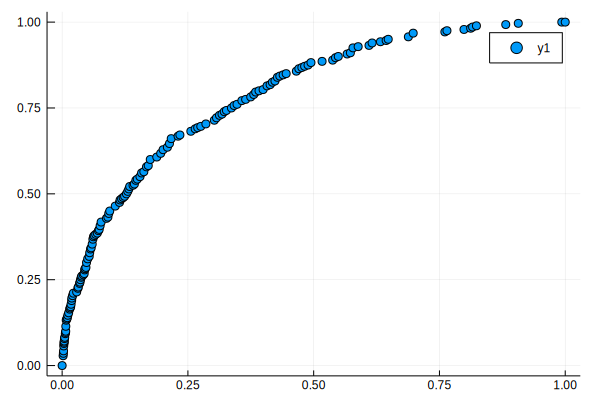

In [11]:
modelB1_x=[0, 0.00199236260999502, 0.00249045326249377, 0.00282251369749294, 0.00315457413249211, 0.00365266478499087, 0.00398472521999004, 0.00415075543748962, 0.00464884608998838, 0.00514693674248713, 0.00630914826498423, 0.00680723891748298, 0.00713929935248215, 0.00730532956998174, 0.00813548065747966, 0.00929769217997676, 0.0102938734849743, 0.0112900547899718, 0.0129503569649676, 0.0149427195749626, 0.0159389008799602, 0.0169350821849577, 0.0177652332724556, 0.0189274447949527, 0.0192595052299519, 0.0207537771874481, 0.0222480491449444, 0.0288892578449278, 0.0313797111074215, 0.0320438319774199, 0.0347003154574132, 0.0355304665449112, 0.0365266478499087, 0.0380209198074049, 0.039183131329902, 0.0421716752448946, 0.0438319774198904, 0.0448281587248879, 0.0456583098123859, 0.0473186119873817, 0.0484808235098788, 0.050805246554873, 0.0537937904698655, 0.054789971774863, 0.0564502739498589, 0.0577785156898556, 0.0597708782998506, 0.0610991200398473, 0.0622613315623443, 0.0639216337373402, 0.0667441474348331, 0.0698987215673253, 0.0722231446123194, 0.0737174165698157, 0.0755437489623111, 0.0775361115723062, 0.0881620454922796, 0.0909845591897725, 0.0926448613647684, 0.0946372239747634, 0.105595218329736, 0.114062759422215, 0.115224970944712, 0.118213514859704, 0.121368088992197, 0.12419060268969, 0.12784326747468, 0.130499750954674, 0.132658143782168, 0.134318445957164, 0.140959654657148, 0.143616138137141, 0.146604682052133, 0.149427195749626, 0.154740162709613, 0.157894736842105, 0.162377552714594, 0.167690519674581, 0.171177154242072, 0.175161879462062, 0.18811223642703, 0.19591565664951, 0.200730532956998, 0.209198074049477, 0.213348829486967, 0.216835464054458, 0.230449941889424, 0.234102606674415, 0.25585256516686, 0.264486136476839, 0.269467043001826, 0.275610161049311, 0.285738004316786, 0.302507056284244, 0.306823841939233, 0.312800929769218, 0.317781836294206, 0.322264652166694, 0.326581437821684, 0.336543250871659, 0.341856217831645, 0.347667275444131, 0.357297028059107, 0.364768387846588, 0.374896231114063, 0.380873318944048, 0.384692013946538, 0.391333222646522, 0.399468703304001, 0.407272123526482, 0.413415241573966, 0.417898057446455, 0.423044994188942, 0.42785987049643, 0.432674746803918, 0.439315955503902, 0.445293043333887, 0.465548729868836, 0.470529636393824, 0.476506724223809, 0.481985721401295, 0.488792960318778, 0.494604017931264, 0.516686036858708, 0.537771874481156, 0.543416901876141, 0.548895899053628, 0.566495102108584, 0.572970280591068, 0.578117217333555, 0.588411090818529, 0.609995019093475, 0.61613813714096, 0.632741158890918, 0.64403121368089, 0.64818196911838, 0.68819525153578, 0.697825004150755, 0.760750456583098, 0.764901212020588, 0.798771376390503, 0.81205379379047, 0.81587248879296, 0.823509878797941, 0.881786485140296, 0.906691017765233, 0.993192761082517, 1]
modelB1_y=[0, 0.0285714285714286, 0.0357142857142857, 0.0428571428571429, 0.0571428571428571, 0.0642857142857143, 0.0678571428571429, 0.0714285714285714, 0.0785714285714286, 0.0821428571428571, 0.0928571428571429, 0.0964285714285714, 0.1, 0.114285714285714, 0.132142857142857, 0.135714285714286, 0.139285714285714, 0.146428571428571, 0.153571428571429, 0.164285714285714, 0.167857142857143, 0.171428571428571, 0.178571428571429, 0.189285714285714, 0.196428571428571, 0.203571428571429, 0.210714285714286, 0.214285714285714, 0.225, 0.228571428571429, 0.239285714285714, 0.242857142857143, 0.25, 0.257142857142857, 0.260714285714286, 0.264285714285714, 0.267857142857143, 0.278571428571429, 0.282142857142857, 0.285714285714286, 0.3, 0.310714285714286, 0.317857142857143, 0.328571428571429, 0.339285714285714, 0.342857142857143, 0.353571428571429, 0.367857142857143, 0.375, 0.378571428571429, 0.382142857142857, 0.385714285714286, 0.392857142857143, 0.396428571428571, 0.407142857142857, 0.417857142857143, 0.428571428571429, 0.432142857142857, 0.442857142857143, 0.45, 0.464285714285714, 0.475, 0.482142857142857, 0.485714285714286, 0.489285714285714, 0.492857142857143, 0.5, 0.507142857142857, 0.514285714285714, 0.521428571428571, 0.525, 0.528571428571429, 0.539285714285714, 0.542857142857143, 0.55, 0.560714285714286, 0.564285714285714, 0.578571428571429, 0.582142857142857, 0.6, 0.607142857142857, 0.617857142857143, 0.628571428571429, 0.635714285714286, 0.646428571428571, 0.660714285714286, 0.667857142857143, 0.671428571428571, 0.682142857142857, 0.689285714285714, 0.692857142857143, 0.696428571428571, 0.703571428571429, 0.714285714285714, 0.721428571428571, 0.728571428571429, 0.732142857142857, 0.739285714285714, 0.742857142857143, 0.75, 0.757142857142857, 0.760714285714286, 0.771428571428571, 0.775, 0.782142857142857, 0.789285714285714, 0.796428571428571, 0.8, 0.803571428571429, 0.814285714285714, 0.817857142857143, 0.825, 0.828571428571429, 0.839285714285714, 0.842857142857143, 0.846428571428571, 0.85, 0.857142857142857, 0.864285714285714, 0.867857142857143, 0.871428571428571, 0.875, 0.882142857142857, 0.885714285714286, 0.889285714285714, 0.896428571428571, 0.9, 0.907142857142857, 0.910714285714286, 0.925, 0.928571428571429, 0.932142857142857, 0.939285714285714, 0.942857142857143, 0.946428571428571, 0.95, 0.957142857142857, 0.967857142857143, 0.971428571428571, 0.975, 0.978571428571429, 0.982142857142857, 0.985714285714286, 0.989285714285714, 0.992857142857143, 0.996428571428571, 1, 1]
scatter(modelB1_x, modelB1_y)

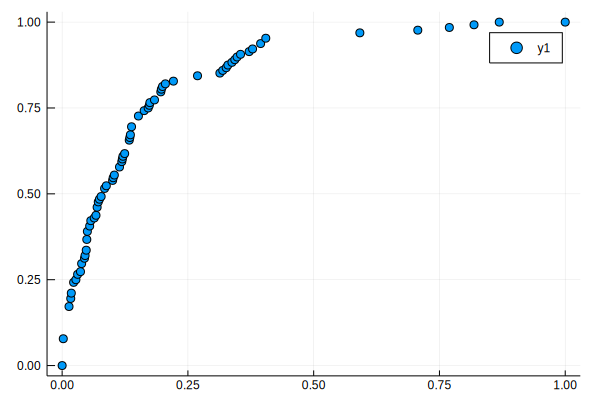

In [12]:
modelB2_x=[0, 0.00228050171037628, 0.0136830102622577, 0.0171037628278221, 0.0182440136830103, 0.0228050171037628, 0.0273660205245154, 0.0307867730900798, 0.0364880273660205, 0.0387685290763968, 0.0444697833523375, 0.0456100342075257, 0.0478905359179019, 0.0490307867730901, 0.0501710376282782, 0.0547320410490308, 0.0570125427594071, 0.0638540478905359, 0.0672748004561003, 0.0695553021664766, 0.0718358038768529, 0.0741163055872292, 0.0775370581527936, 0.0843785632839225, 0.0877993158494869, 0.100342075256556, 0.101482326111745, 0.103762827822121, 0.114025085518814, 0.118586088939567, 0.119726339794755, 0.120866590649943, 0.124287343215507, 0.133409350057013, 0.134549600912201, 0.135689851767389, 0.137970353477765, 0.151653363740023, 0.163055872291904, 0.171037628278221, 0.173318129988597, 0.174458380843786, 0.183580387685291, 0.19612314709236, 0.197263397947548, 0.199543899657925, 0.205245153933865, 0.221208665906499, 0.269099201824401, 0.313568985176739, 0.31927023945268, 0.326111744583808, 0.329532497149373, 0.33751425313569, 0.343215507411631, 0.347776510832383, 0.354618015963512, 0.371721778791334, 0.378563283922463, 0.394526795895097, 0.40478905359179, 0.591790193842645, 0.706955530216648, 0.769669327251995, 0.818700114025085, 0.868871151653364, 1]
modelB2_y=[0, 0.078125, 0.171875, 0.1953125, 0.2109375, 0.2421875, 0.25, 0.265625, 0.2734375, 0.296875, 0.3125, 0.3203125, 0.3359375, 0.3671875, 0.390625, 0.40625, 0.421875, 0.4296875, 0.4375, 0.4609375, 0.4765625, 0.484375, 0.4921875, 0.515625, 0.5234375, 0.5390625, 0.546875, 0.5546875, 0.578125, 0.59375, 0.6015625, 0.609375, 0.6171875, 0.65625, 0.6640625, 0.671875, 0.6953125, 0.7265625, 0.7421875, 0.75, 0.7578125, 0.765625, 0.7734375, 0.796875, 0.8046875, 0.8125, 0.8203125, 0.828125, 0.84375, 0.8515625, 0.859375, 0.8671875, 0.875, 0.8828125, 0.890625, 0.8984375, 0.90625, 0.9140625, 0.921875, 0.9375, 0.953125, 0.96875, 0.9765625, 0.984375, 0.9921875, 1, 1]
scatter(modelB2_x, modelB2_y)

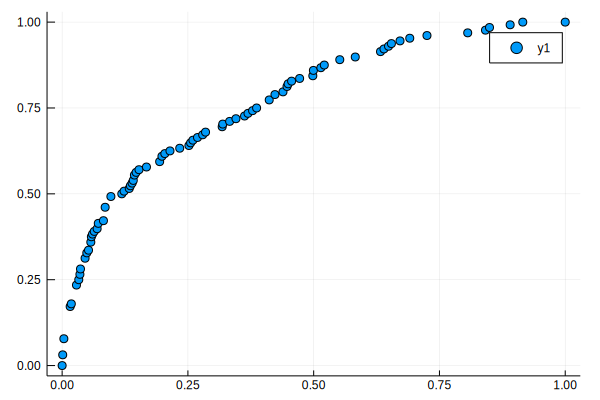

In [13]:
modelB3_x=[0, 0.00114025085518814, 0.00342075256556442, 0.015963511972634, 0.0182440136830103, 0.0285062713797035, 0.0330672748004561, 0.0353477765108324, 0.0364880273660205, 0.0456100342075257, 0.0490307867730901, 0.0524515393386545, 0.0570125427594071, 0.0581527936145952, 0.0604332953249715, 0.0638540478905359, 0.0695553021664766, 0.0718358038768529, 0.0820980615735462, 0.0855188141391106, 0.096921322690992, 0.118586088939567, 0.123147092360319, 0.133409350057013, 0.135689851767389, 0.139110604332953, 0.14139110604333, 0.143671607753706, 0.14709236031927, 0.152793614595211, 0.167616875712657, 0.193842645381984, 0.198403648802737, 0.204104903078677, 0.214367160775371, 0.233751425313569, 0.251995438996579, 0.255416191562144, 0.259977194982896, 0.269099201824401, 0.279361459521095, 0.285062713797035, 0.318129988597491, 0.31927023945268, 0.332953249714937, 0.345496009122007, 0.362599771949829, 0.369441277080958, 0.378563283922463, 0.38654503990878, 0.411630558722919, 0.4230330672748, 0.438996579247434, 0.446978335233751, 0.449258836944128, 0.456100342075257, 0.472063854047891, 0.498289623717218, 0.499429874572406, 0.514253135689852, 0.521094640820981, 0.55188141391106, 0.58266818700114, 0.632839224629418, 0.639680729760547, 0.648802736602052, 0.654503990877993, 0.671607753705815, 0.690992018244014, 0.725199543899658, 0.806157354618016, 0.841505131128848, 0.849486887115165, 0.890535917901938, 0.915621436716078, 1]
modelB3_y=[0, 0.03125, 0.078125, 0.171875, 0.1796875, 0.234375, 0.25, 0.265625, 0.28125, 0.3125, 0.328125, 0.3359375, 0.359375, 0.375, 0.3828125, 0.390625, 0.3984375, 0.4140625, 0.421875, 0.4609375, 0.4921875, 0.5, 0.5078125, 0.515625, 0.5234375, 0.53125, 0.5390625, 0.5546875, 0.5625, 0.5703125, 0.578125, 0.59375, 0.609375, 0.6171875, 0.625, 0.6328125, 0.640625, 0.6484375, 0.65625, 0.6640625, 0.671875, 0.6796875, 0.6953125, 0.703125, 0.7109375, 0.71875, 0.7265625, 0.734375, 0.7421875, 0.75, 0.7734375, 0.7890625, 0.796875, 0.8125, 0.8203125, 0.828125, 0.8359375, 0.84375, 0.859375, 0.8671875, 0.875, 0.890625, 0.8984375, 0.9140625, 0.921875, 0.9296875, 0.9375, 0.9453125, 0.953125, 0.9609375, 0.96875, 0.9765625, 0.984375, 0.9921875, 1, 1]
scatter(modelB3_x, modelB3_y)

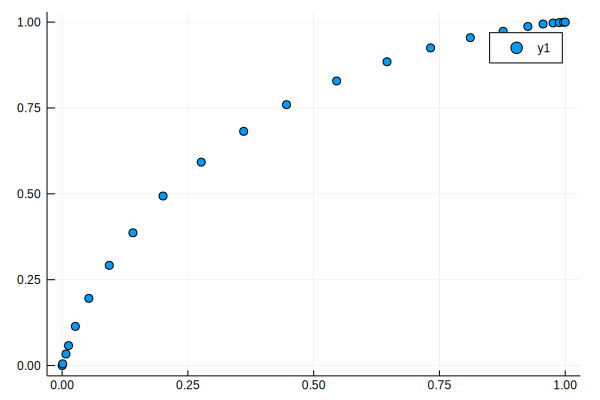

In [14]:
modelC1_x=[0, 0.00117794879849223, 0.00753887231035024, 0.012721847023716, 0.0263075231663264, 0.0530862258520496, 0.0936861944400817, 0.140725616459871, 0.200565415423276, 0.276503847966075, 0.360844981938118, 0.445971415109157, 0.545625883461599, 0.645751531333438, 0.732370032982566, 0.811371132401445, 0.876550965918015, 0.92578922569499, 0.955944714936391, 0.975891314590859, 0.987984922255379, 0.996466153604523, 1]
modelC1_y=[0, 0.00507162558946525, 0.0336328854880327, 0.0581012545600142, 0.114067087819201, 0.195657976688317, 0.291751935225554, 0.386600231337308, 0.493638224041285, 0.592312483317021, 0.681911202064241, 0.75958715188184, 0.82872141649613, 0.884598273867782, 0.9249043509209, 0.954800249132485, 0.973485185514726, 0.987365423970104, 0.994483494972862, 0.9974196992615, 0.998576385799448, 0.999555120562328, 1]
scatter(modelC1_x, modelC1_y)

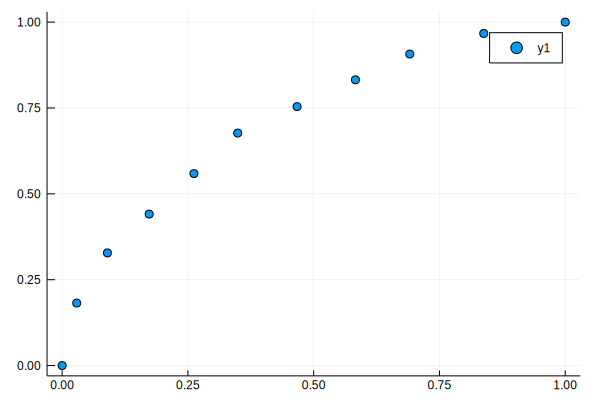

In [15]:
modelD1_x=[0, 0.029, 0.09, 0.173, 0.262, 0.349, 0.467, 0.583, 0.691, 0.838, 1]
modelD1_y=[0, 0.182, 0.328, 0.441, 0.559, 0.677, 0.754, 0.832, 0.907, 0.967, 1]
scatter(modelD1_x, modelD1_y)

# B. Funkcje ROC

Przetestowane zostaną następujące funkcje rysujące krzywą ROC na podstawie 1-4 parametrów:

1) Funkcja bifraktalna: 

$f(x)= \left(1-b\right)x^{\frac{1-g}{1+g}} + b \left(1-\left(1-x\right)^{\frac{1+g}{1-g}}\right)$

2) Funkcja binormalna:

$f(x)= \Phi\left(\Phi^{-1}\left(\frac{g+1}{2}\right)\sqrt{1+a^2} + a\Phi^{-1}\left(x\right) \right)$

3) Funkcja midnormalna:

$f(x)= \Phi\left(\Phi^{-1}\left(\frac{g+1}{2}\right)\sqrt{2} + \Phi^{-1}\left(x\right) \right)$

4) Funkcja bilogistyczna:

$f(x)= \left({1+e^{\left(a_1 ln\left(\frac{1}{x}-1\right) - a_0 \right)}}\right)^{-1} $

5) Funkcja bibeta:

$f(x)= F_{a_B, b_B}\left(F^{-1}_{a_G, b_G}\left( x \right) \right)$

6) Funkcja simple bibeta:

$ f(x) = 1 - \left(1-x^{1/a}\right)^b $

7) Funkcja bigamma:

$f(x)= G_{a_2, b_2}\left(G^{-1}_{a_1, b_1}\left( x \right) \right)$

8) Funkcja potęgowa: 

$ f(x) = x^{\frac{1-g}{1+g}} $

9) Funkcja midfractalna:

$f(x)= \frac{x^{\frac{1-g}{1+g}} + \left(1-\left(1-x\right)^{\frac{1+g}{1-g}}\right)}{2}$

In [16]:
FuncBiFractal(x,b,g) = (1-b)*x^((1-g)/(1+g))+b*(1-(1-x)^((1+g)/(1-g)))
FuncBiNormal(x,a1,g) = cdf.(Normal(), quantile(Normal(),(g+1)/2) * sqrt(1+a1^2) + a1*quantile(Normal(),x))
FuncMidNormal(x,g) = cdf.(Normal(), quantile(Normal(),(g+1)/2) * sqrt(2) + quantile(Normal(),x))
FuncBiLogistic(x, a0, a1) = 1/(1+exp(a1*log(1/x-1)-a0))
FuncBiBeta(x, aG, bG, aB, bB) = cdf.(Beta(aB,bB),quantile(Beta(aG,bG),x))
FuncSBiBeta(x, a, b) = 1-(1-x^(1/a))^b
FuncBiGamma(x, a1, b1, a2, b2) = cdf.(Gamma(a2,b2),quantile(Gamma(a1,b1),x))
FuncPower(x,g)= x^((1-g)/(1+g))
FuncMidFractal(x,g)= FuncBiFractal(x,0.5,g)

FuncMidFractal (generic function with 1 method)

Przykład...

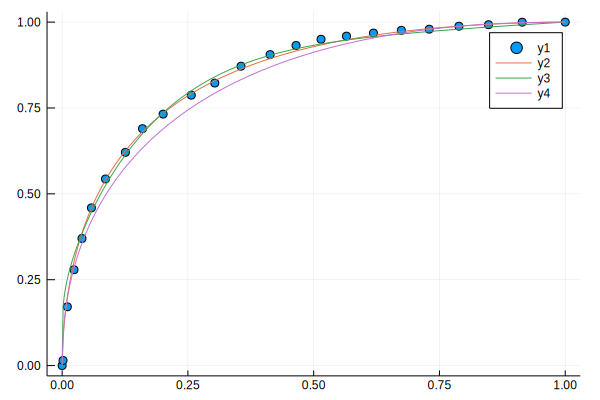

In [17]:
scatter(invest_x, invest_y)
plot!(0.0:0.002:1.0, FuncBiNormal.(0.0:0.002:1.0,1.0,.7))
plot!(0.0:0.002:1.0, FuncBiFractal.(0.0:0.002:1.0,.5,.7))
plot!(0.0:0.002:1.0, FuncBiBeta.(0.0:0.002:1.0,1.5,.7,.7,1.5))

# C. Przykład optymalizacji

In [18]:
x=invest_x
y=invest_y
tmp=vcat(x[2], x[3:length(x)-1]/2-x[2:length(x)-2]/2, x[length(x)]-x[length(x)-1])
x2=vcat([0], tmp[1:length(tmp)-1]+tmp[2:length(tmp)], [0])
sum(x2)

1.0

In [19]:
FuncBiFractalObj(prm)=sum(x2.*abs.(FuncBiFractal.(x,prm[1],prm[2])-y))
FuncBiNormalObj(prm)=sum(x2.*abs.(FuncBiNormal.(x,prm[1],prm[2])-y))
FuncMidNormalObj(prm)=sum(x2.*abs.(FuncMidNormal.(x,prm[1])-y))
FuncBiLogisticObj(prm)=sum(x2.*abs.(FuncBiLogistic.(x,prm[1],prm[2])-y))
FuncBiBetaObj(prm)=sum(x2.*abs.(FuncBiBeta.(x,prm[1],prm[2],prm[3],prm[4])-y))
FuncSBiBetaObj(prm)=sum(x2.*abs.(FuncSBiBeta.(x,prm[1],prm[2])-y))
FuncBiGammaObj(prm)=sum(x2.*abs.(FuncBiGamma.(x,prm[1],prm[2],prm[3],prm[4])-y))
FuncPowerObj(prm)=sum(x2.*abs.(FuncPower.(x,prm[1])-y))
FuncMidFractalObj(prm)=sum(x2.*abs.(FuncMidFractal.(x,prm[1])-y))

FuncMidFractalObj (generic function with 1 method)

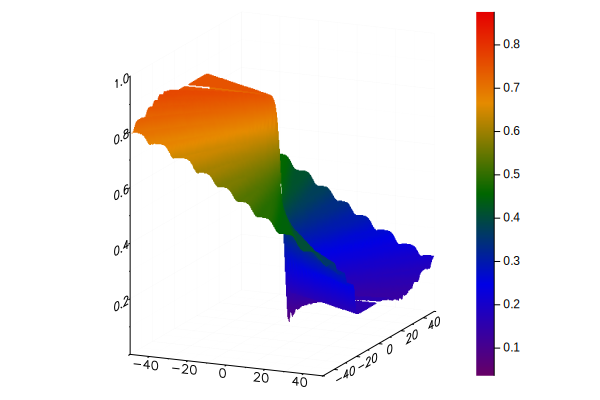

In [20]:
x1, y1 = range(-50,stop=50,length=101), range(-50,stop=50,length=101)
z = Surface((x1,y1)->FuncBiLogisticObj([x1,y1]), x1, y1)
surface(x1,y1,z, linealpha = 0.3, c=:darkrainbow)

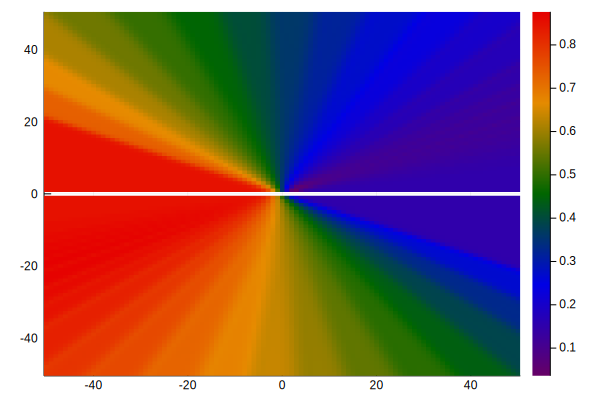

In [21]:
heatmap(x1, y1, z, c=:darkrainbow)

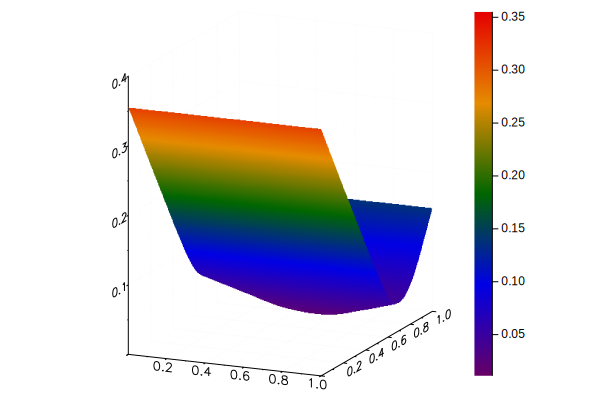

In [22]:
x1, y1 = range(0,stop=1,length=101), range(0,stop=1,length=101)
z = Surface((x1,y1)->FuncBiFractalObj([x1,y1]), x1, y1)
surface(x1,y1,z, linealpha = 0.3, c=:darkrainbow)

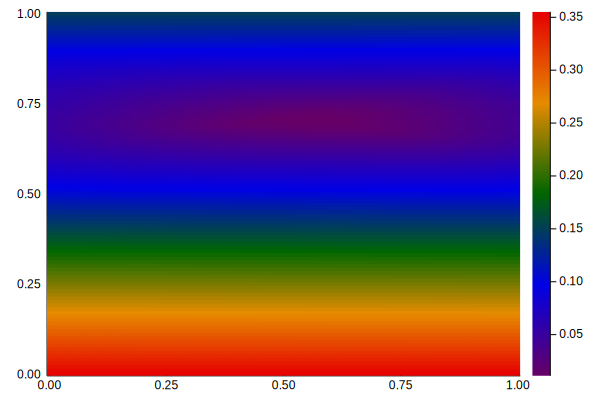

In [23]:
heatmap(x1, y1, z, c=:darkrainbow)

In [24]:
    my_method=:probabilistic_descent
    resBiFractal=bboptimize(FuncBiFractalObj; SearchRange = [(0.0, 1.0), (0.0, 1.0)], Method = my_method, MaxTime = 2.0)


Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.232529504
0.50 secs, 19230 evals, 10621 steps, fitness=0.010933232
1.00 secs, 62589 evals, 34556 steps, fitness=0.010933231
1.50 secs, 100949 evals, 55729 steps, fitness=0.010933231

Optimization stopped after 78108 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 39034.484172508775
Function evals per second = 70726.63924348507
Improvements/step = NaN
Total function evaluations = 141524


Best candidate found: [0.562716, 0.708293]

Fitness: 0.010933231



BlackBoxOptim.OptimizationResults("probabilistic_descent", "Max time (2.0 s) reached", 78108, 1.559729921283e9, 2.000999927520752, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed=>892215,:MaxTime=>2.0,:SearchRange=>Tuple{Float64,Float64}[(0.0, 1.0), (0.0, 1.0)],:Method=>:probabilistic_descent,:DirectionGenerator=>MirroredRandomDirectionGen(2, 2),:MaxFuncEvals=>0,:MaxSteps=>0),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme=>ScalarFitnessScheme{true}(),:NumDimensions=>:NotSpecified,:PopulationSize=>50,:MaxTime=>0.0,:SearchRange=>(-1.0, 1.0),:Method=>:adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals=>100,:RngSeed=>1234,:MaxFuncEvals=>0,:SaveTrace=>false…)], 141524, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.010933231328028944, [0.562716, 0.708293]), BlackBoxOptim.DummyMethodOutput())

In [25]:
println(BlackBoxOptim.best_candidate(resBiFractal)[1])
println(BlackBoxOptim.best_candidate(resBiFractal)[2])
println(BlackBoxOptim.best_fitness(resBiFractal))

0.5627155225196268
0.7082929983745561
0.010933231328028944


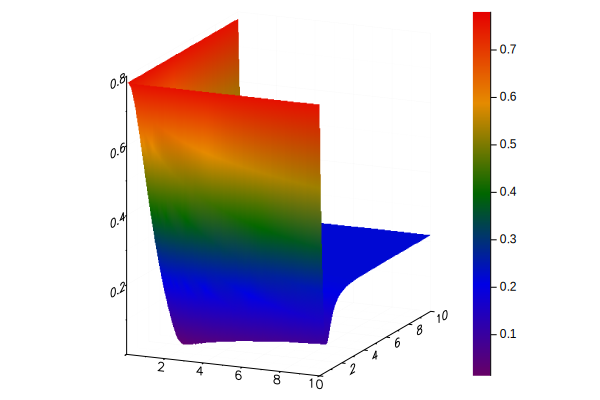

In [26]:
x=modelB3_x
y=modelB3_y
tmp=vcat(x[2], x[3:length(x)-1]/2-x[2:length(x)-2]/2, x[length(x)]-x[length(x)-1])
x2=vcat([0], tmp[1:length(tmp)-1]+tmp[2:length(tmp)], [0])
x1, y1 = range(0,stop=10,length=101), range(0,stop=10,length=101)
z = Surface((x1,y1)->FuncSBiBetaObj([x1,y1]), x1, y1)
surface(x1,y1,z, linealpha = 0.3, c=:darkrainbow)


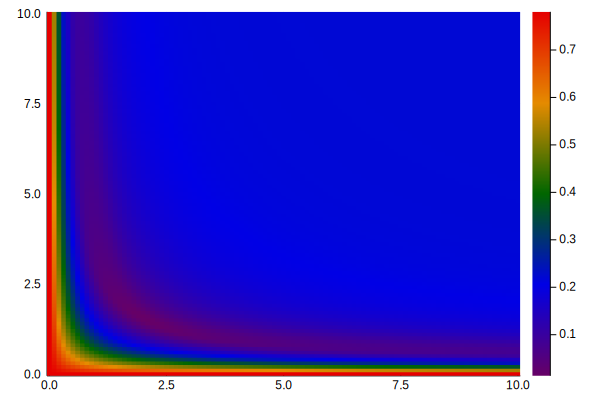

In [27]:
heatmap(x1, y1, z, c=:darkrainbow)

In [28]:
  my_method=:probabilistic_descent
  resBiBeta=bboptimize(FuncSBiBetaObj; SearchRange = [(0.0, 1000.0), (0.0, 1000.0)], Method = my_method, MaxTime = 4.0)


Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.219520560
0.50 secs, 20829 evals, 11587 steps, fitness=0.013036889
1.00 secs, 42705 evals, 24053 steps, fitness=0.013036889
1.50 secs, 61234 evals, 34660 steps, fitness=0.013036889
2.00 secs, 80403 evals, 45621 steps, fitness=0.013036889
2.50 secs, 96882 evals, 55065 steps, fitness=0.013036889
3.01 secs, 117422 evals, 66793 steps, fitness=0.013036889
3.51 secs, 138163 evals, 78667 steps, fitness=0.013036889

Optimization stopped after 90308 steps and 4.000999927520752 seconds
Termination reason: Max time (4.0 s) reached
Steps per second = 22571.357569596355
Function evals per second = 39630.59306983144
Improvements/step = NaN
Total function evaluations = 158562


Best candidate found: [2.01922, 1.54533]

Fitness: 0.013036889



BlackBoxOptim.OptimizationResults("probabilistic_descent", "Max time (4.0 s) reached", 90308, 1.559729927082e9, 4.000999927520752, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed=>157217,:MaxTime=>4.0,:SearchRange=>Tuple{Float64,Float64}[(0.0, 1000.0), (0.0, 1000.0)],:Method=>:probabilistic_descent,:DirectionGenerator=>MirroredRandomDirectionGen(2, 2),:MaxFuncEvals=>0,:MaxSteps=>0),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme=>ScalarFitnessScheme{true}(),:NumDimensions=>:NotSpecified,:PopulationSize=>50,:MaxTime=>0.0,:SearchRange=>(-1.0, 1.0),:Method=>:adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals=>100,:RngSeed=>1234,:MaxFuncEvals=>0,:SaveTrace=>false…)], 158562, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(0.01303688923483866, [2.01922, 1.54533]), BlackBoxOptim.DummyMethodOutput())

In [29]:
println(BlackBoxOptim.best_candidate(resBiBeta)[1])
println(BlackBoxOptim.best_candidate(resBiBeta)[2])
println(BlackBoxOptim.best_fitness(resBiBeta))

2.0192199826932677
1.5453256132769193
0.01303688923483866


## 4. Całość

In [30]:
df = DataFrame(Dataset = String[], x1 = String[], BiFractalObj = Float64[], BiFractal1 = Float64[], BiFractal2 = Float64[]
        , x2=String[], BiNormalObj = Float64[], BiNormal1 = Float64[], BiNormal2 = Float64[]
        , x3=String[], MidNormalObj= Float64[], MidNormal1 = Float64[]
        , x4=String[], BiLogisticObj = Float64[], BiLogistic1 = Float64[], BiLogistic2 = Float64[]
        , x5=String[], SBiBetaObj = Float64[], SBiBeta1 = Float64[], SBiBeta2 = Float64[]
        , x6=String[], BiGammaObj = Float64[], BiGamma1 = Float64[], BiGamma2 = Float64[], BiGamma3 = Float64[], BiGamma4 = Float64[]
        , x7=String[], PowerObj= Float64[], Power1 = Float64[]
        , x8=String[], MidFractalObj= Float64[], MidFractal1 = Float64[]
        , x9=String[], BiBetaObj = Float64[], BiBeta1 = Float64[], BiBeta2 = Float64[], BiBeta3 = Float64[], BiBeta4 = Float64[]
    )

,Dataset,x1,BiFractalObj,BiFractal1,BiFractal2,x2,BiNormalObj,BiNormal1
,String,String,Float64,Float64,Float64,String,Float64,Float64


In [31]:
function myoptimize(input_name, x_, y_, input_method)
    tmp=vcat(x_[2], x_[3:length(x_)-1]/2-x_[2:length(x_)-2]/2, x_[length(x_)]-x_[length(x_)-1])
    x2_=vcat([0], tmp[1:length(tmp)-1]+tmp[2:length(tmp)], [0]) 
  FuncBiFractalObj(prm)=sum(x2_.*abs.(FuncBiFractal.(x_,prm[1],prm[2])-y_))
  FuncBiNormalObj(prm)=sum(x2_.*abs.(FuncBiNormal.(x_,prm[1],prm[2])-y_))
  FuncMidNormalObj(prm)=sum(x2_.*abs.(FuncMidNormal.(x_,prm[1])-y_))
  FuncBiLogisticObj(prm)=sum(x2_.*abs.(FuncBiLogistic.(x_,prm[1],prm[2])-y_))
  FuncBiBetaObj(prm)=sum(x2_.*abs.(FuncBiBeta.(x_,prm[1],prm[2],prm[3],prm[4])-y_))
  FuncSBiBetaObj(prm)=sum(x2_.*abs.(FuncSBiBeta.(x_,prm[1],prm[2])-y_))
  FuncBiGammaObj(prm)=sum(x2_.*abs.(FuncBiGamma.(x_,prm[1],prm[2],prm[3],prm[4])-y_))
  FuncPowerObj(prm)=sum(x2_.*abs.(FuncPower.(x_,prm[1])-y_))
  FuncMidFractalObj(prm)=sum(x2_.*abs.(FuncMidFractal.(x_,prm[1])-y_))
    resBiFractal=bboptimize(FuncBiFractalObj; SearchRange = [(0.0, 1.0), (0.0, 1.0)], Method = input_method, MaxTime = 2.0)
    resBiNormal=bboptimize(FuncBiNormalObj; SearchRange = [(0.0, 1000.0), (0.0, 1.0)], Method = input_method, MaxTime = 2.0)
    resMidNormal=bboptimize(FuncMidNormalObj; SearchRange = [(0.0, 1.0)], Method = input_method, MaxTime = 2.0)
    resBiLogistic=bboptimize(FuncBiLogisticObj; SearchRange = [(0.0,10.0), (0.0,10.0)], Method = input_method, MaxTime = 3.0)
    resSBiBeta=bboptimize(FuncSBiBetaObj; SearchRange = [(0.0,10.0), (0.0,10.0)], Method = input_method, MaxTime = 5.0)
    resBiGamma=bboptimize(FuncBiGammaObj; SearchRange = [(0.0,10.0), (0.0,10.0), (0.0,10.0), (0.0,10.0)], Method = input_method, MaxTime = 3.0)
    resPower=bboptimize(FuncPowerObj; SearchRange = [(0.0, 1.0)], Method = input_method, MaxTime = 2.0)
    resMidFractal=bboptimize(FuncMidFractalObj; SearchRange = [(0.0, 1.0)], Method = input_method, MaxTime = 2.0)
    resBiBeta=bboptimize(FuncBiBetaObj; SearchRange = [(0.0, 100.0), (0.0, 100.00), (0.0, 100.00), (0.0, 100.00)], Method = input_method, MaxTime = 4.0)
  return [input_name
        , "BiFractal: ", BlackBoxOptim.best_fitness(resBiFractal), BlackBoxOptim.best_candidate(resBiFractal)[1],BlackBoxOptim.best_candidate(resBiFractal)[2]
        ,"BiNormal: ", BlackBoxOptim.best_fitness(resBiNormal), BlackBoxOptim.best_candidate(resBiNormal)[1],BlackBoxOptim.best_candidate(resBiNormal)[2]
        ,"MidNormal: ", BlackBoxOptim.best_fitness(resMidNormal), BlackBoxOptim.best_candidate(resMidNormal)[1]
        ,"BiLogistic: ", BlackBoxOptim.best_fitness(resBiLogistic), BlackBoxOptim.best_candidate(resBiLogistic)[1],BlackBoxOptim.best_candidate(resBiLogistic)[2]
        ,"SBiBeta: ", BlackBoxOptim.best_fitness(resSBiBeta), BlackBoxOptim.best_candidate(resSBiBeta)[1],BlackBoxOptim.best_candidate(resSBiBeta)[2]
        ,"BiGamma: ", BlackBoxOptim.best_fitness(resBiGamma), BlackBoxOptim.best_candidate(resBiGamma)[1],BlackBoxOptim.best_candidate(resBiGamma)[2],BlackBoxOptim.best_candidate(resBiGamma)[3],BlackBoxOptim.best_candidate(resBiGamma)[4]
        ,"Power: ", BlackBoxOptim.best_fitness(resPower), BlackBoxOptim.best_candidate(resPower)[1]
        ,"MidFractal: ", BlackBoxOptim.best_fitness(resMidFractal), BlackBoxOptim.best_candidate(resMidFractal)[1]
        ,"BiBeta: ", BlackBoxOptim.best_fitness(resBiBeta), BlackBoxOptim.best_candidate(resBiBeta)[1],BlackBoxOptim.best_candidate(resBiBeta)[2],BlackBoxOptim.best_candidate(resBiBeta)[3],BlackBoxOptim.best_candidate(resBiBeta)[4]
    ]
end

myoptimize (generic function with 1 method)

In [32]:
#@suppress begin
   
  res=myoptimize("Invest", invest_x, invest_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("Rezac", rezac_x, rezac_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("Rezac2", rezac2_x, rezac2_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("Tobback", tobback_x, tobback_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("CoreMetrixA", coremetrixa_x, coremetrixa_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("CoreMetrixB", coremetrixb_x, coremetrixb_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("FICO", fico_x, fico_y, :probabilistic_descent)
  push!(df, res)

  res=myoptimize("model A1", modelA1_x, modelA1_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model A2", modelA2_x, modelA2_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model B1", modelB1_x, modelB1_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model B2", modelB2_x, modelB2_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model B3", modelB3_x, modelB3_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model C1", modelC1_x, modelC1_y, :probabilistic_descent)
  push!(df, res)
  res=myoptimize("model D1", modelD1_x, modelD1_y, :probabilistic_descent)
  push!(df, res)

#end

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.058327996
0.50 secs, 70103 evals, 38751 steps, fitness=0.010933232
1.00 secs, 128131 evals, 70845 steps, fitness=0.010933231
1.50 secs, 173953 evals, 96024 steps, fitness=0.010933231

Optimization stopped after 121464 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 60701.651374117966
Function evals per second = 110013.9969883717
Improvements/step = NaN
Total function evaluations = 220138


Best candidate found: [0.562716, 0.708293]

Fitness: 0.010933231

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.134381139
0.50 secs, 70413 evals, 37259 steps, fitness=0.005159102
1.00 secs, 193660 evals, 102491 steps, fitness=0.005149429
1.50 secs, 301003 evals, 159407 steps, fitness=0.005149429

Optimization stopped af

1.50 secs, 301623 evals, 159703 steps, fitness=0.005104514

Optimization stopped after 207992 steps and 2.001000165939331 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 103944.01936611642
Function evals per second = 196313.8267985082
Improvements/step = NaN
Total function evaluations = 392824


Best candidate found: [0.458977]

Fitness: 0.005104514

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.193041260
0.50 secs, 137967 evals, 76641 steps, fitness=0.012758783
1.00 secs, 275676 evals, 152960 steps, fitness=0.012758783
1.51 secs, 417764 evals, 231824 steps, fitness=0.012758783
2.01 secs, 556921 evals, 308927 steps, fitness=0.012758783
2.51 secs, 690101 evals, 382795 steps, fitness=0.012758783

Optimization stopped after 457344 steps and 3.003999948501587 seconds
Termination reason: Max time (3.0 s) reached
Steps per second = 152245.00926776844
Function evals per second

3.01 secs, 617013 evals, 343750 steps, fitness=0.005010871
3.51 secs, 729017 evals, 406174 steps, fitness=0.005010871
4.01 secs, 836526 evals, 466158 steps, fitness=0.005010871
4.51 secs, 948426 evals, 528658 steps, fitness=0.005010871

Optimization stopped after 587601 steps and 5.001000165939331 seconds
Termination reason: Max time (5.0 s) reached
Steps per second = 117496.6967611831
Function evals per second = 210807.2315574463
Improvements/step = NaN
Total function evaluations = 1054247


Best candidate found: [1.48696, 1.68487]

Fitness: 0.005010871

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.718125714
0.50 secs, 18053 evals, 10155 steps, fitness=0.004409726
1.00 secs, 36042 evals, 20299 steps, fitness=0.004298108
1.50 secs, 54778 evals, 30798 steps, fitness=0.004298108
2.00 secs, 72185 evals, 40593 steps, fitness=0.004298108
2.51 secs, 88756 evals, 49930 steps, fitness=0.004298108

Op

0.50 secs, 97418 evals, 51639 steps, fitness=0.015902204
1.00 secs, 192968 evals, 102326 steps, fitness=0.015902204
1.50 secs, 299243 evals, 158738 steps, fitness=0.015902204

Optimization stopped after 208238 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 104066.97028620477
Function evals per second = 196252.8806717947
Improvements/step = NaN
Total function evaluations = 392702


Best candidate found: [1.15729, 0.675114]

Fitness: 0.015902204

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.112480673
0.50 secs, 97757 evals, 51723 steps, fitness=0.018333162
1.00 secs, 202094 evals, 106930 steps, fitness=0.018333162
1.50 secs, 305034 evals, 161357 steps, fitness=0.018333162

Optimization stopped after 213560 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 106726.6405474596
Function evals per s

2.51 secs, 749504 evals, 414333 steps, fitness=0.012523479

Optimization stopped after 520182 steps and 3.000999927520752 seconds
Termination reason: Max time (3.0 s) reached
Steps per second = 173336.22544594444
Function evals per second = 313505.8389612354
Improvements/step = NaN
Total function evaluations = 940831


Best candidate found: [1.32118, 1.05836]

Fitness: 0.012523479

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.245479554
0.50 secs, 113977 evals, 62546 steps, fitness=0.006532954
1.00 secs, 221548 evals, 121718 steps, fitness=0.006532954
1.50 secs, 328913 evals, 180700 steps, fitness=0.006532954
2.00 secs, 428316 evals, 235291 steps, fitness=0.006532954
2.50 secs, 532640 evals, 292658 steps, fitness=0.006532954
3.01 secs, 617728 evals, 339341 steps, fitness=0.006532954
3.51 secs, 713157 evals, 391706 steps, fitness=0.006532954
4.01 secs, 817486 evals, 449140 steps, fitness=0.0065

2.00 secs, 41936 evals, 23232 steps, fitness=0.006262712
2.50 secs, 50788 evals, 28145 steps, fitness=0.006262712
3.01 secs, 60765 evals, 33653 steps, fitness=0.006262712
3.51 secs, 69889 evals, 38713 steps, fitness=0.006262712

Optimization stopped after 44644 steps and 4.000999927520752 seconds
Termination reason: Max time (4.0 s) reached
Steps per second = 11158.210649522298
Function evals per second = 20132.717185504676
Improvements/step = NaN
Total function evaluations = 80551


Best candidate found: [59.2826, 3.33041, 61.9174, 5.0358]

Fitness: 0.006262712

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.069368975
0.50 secs, 100273 evals, 55892 steps, fitness=0.007249966
1.00 secs, 182502 evals, 101631 steps, fitness=0.007249966
1.50 secs, 264418 evals, 146959 steps, fitness=0.007249954

Optimization stopped after 189050 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0


Optimization stopped after 243642 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 121760.12435036595
Function evals per second = 230158.92887643483
Improvements/step = NaN
Total function evaluations = 460548


Best candidate found: [1.04515, 0.533013]

Fitness: 0.003541990

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.035514859
0.50 secs, 124779 evals, 66018 steps, fitness=0.004967572
1.00 secs, 241935 evals, 128006 steps, fitness=0.004967572
1.50 secs, 366975 evals, 194152 steps, fitness=0.004967572

Optimization stopped after 256874 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 128372.81824306113
Function evals per second = 242539.73892008892
Improvements/step = NaN
Total function evaluations = 485322


Best candidate found: [0.534335]

Fitness: 0.004967572

Starting optimization with 

2.50 secs, 28116 evals, 15834 steps, fitness=0.003639026
3.01 secs, 33210 evals, 18728 steps, fitness=0.003639026
3.51 secs, 38216 evals, 21529 steps, fitness=0.003639026

Optimization stopped after 24615 steps and 4.000999927520752 seconds
Termination reason: Max time (4.0 s) reached
Steps per second = 6152.212058462311
Function evals per second = 10933.516818908542
Improvements/step = NaN
Total function evaluations = 43745


Best candidate found: [35.3989, 39.4073, 34.3128, 48.2102]

Fitness: 0.003639026

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.209772150
0.50 secs, 16677 evals, 9357 steps, fitness=0.005724836
1.00 secs, 31564 evals, 17697 steps, fitness=0.005724043
1.50 secs, 49199 evals, 27596 steps, fitness=0.005724043

Optimization stopped after 36813 steps and 2.001000165939331 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 18397.299823670353
Function evals

0.50 secs, 10423 evals, 5514 steps, fitness=0.006913958
1.00 secs, 20492 evals, 10845 steps, fitness=0.006913958
1.50 secs, 31159 evals, 16485 steps, fitness=0.006913958

Optimization stopped after 21304 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 10646.67704730792
Function evals per second = 20124.9382601901
Improvements/step = NaN
Total function evaluations = 40270


Best candidate found: [0.336174]

Fitness: 0.006913958

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.175236641
0.50 secs, 21491 evals, 11734 steps, fitness=0.007312107
1.00 secs, 41310 evals, 22536 steps, fitness=0.007312107
1.50 secs, 61886 evals, 33757 steps, fitness=0.007312107
2.00 secs, 82336 evals, 44896 steps, fitness=0.007312107
2.51 secs, 103110 evals, 56248 steps, fitness=0.007312107

Optimization stopped after 68496 steps and 3.001000165939331 seconds
Terminatio

2.51 secs, 56612 evals, 31906 steps, fitness=0.006443945
3.01 secs, 68716 evals, 38676 steps, fitness=0.006443945
3.51 secs, 80866 evals, 45504 steps, fitness=0.006443945
4.01 secs, 92612 evals, 52162 steps, fitness=0.006443945
4.51 secs, 104924 evals, 59124 steps, fitness=0.006443945

Optimization stopped after 65722 steps and 5.001000165939331 seconds
Termination reason: Max time (5.0 s) reached
Steps per second = 13141.771209610733
Function evals per second = 23334.93223911557
Improvements/step = NaN
Total function evaluations = 116698


Best candidate found: [1.79071, 1.84387]

Fitness: 0.006443945

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.774123117
0.50 secs, 1416 evals, 802 steps, fitness=0.014587969
1.00 secs, 2848 evals, 1618 steps, fitness=0.007178175
1.50 secs, 4118 evals, 2337 steps, fitness=0.007172162
2.00 secs, 5334 evals, 3025 steps, fitness=0.007172162
2.51 secs, 6489 eval

1.00 secs, 90588 evals, 47978 steps, fitness=0.059884052
1.50 secs, 137848 evals, 73001 steps, fitness=0.059884052

Optimization stopped after 97136 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 48543.72989425939
Function evals per second = 91640.68297953413
Improvements/step = NaN
Total function evaluations = 183373


Best candidate found: [0.770805]

Fitness: 0.059884052

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.279882992
0.50 secs, 24845 evals, 13134 steps, fitness=0.021974165
1.00 secs, 49010 evals, 25933 steps, fitness=0.021974165
1.50 secs, 70869 evals, 37509 steps, fitness=0.021974165

Optimization stopped after 49007 steps and 2.001000165939331 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 24491.252341798085
Function evals per second = 46268.36198013941
Improvements/step = NaN
Total function evaluation


Optimization stopped after 6456 steps and 4.000999927520752 seconds
Termination reason: Max time (4.0 s) reached
Steps per second = 1613.5966300805474
Function evals per second = 2820.7948523991727
Improvements/step = NaN
Total function evaluations = 11286


Best candidate found: [35.8775, 20.2045, 28.2617, 21.6409]

Fitness: 0.014630115

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.101396485
0.50 secs, 68646 evals, 37985 steps, fitness=0.006174199
1.00 secs, 128507 evals, 71122 steps, fitness=0.006174132
1.50 secs, 192734 evals, 106745 steps, fitness=0.006174080

Optimization stopped after 144833 steps and 2.000999927520752 seconds
Termination reason: Max time (2.0 s) reached
Steps per second = 72380.31246680192
Function evals per second = 130645.68189360359
Improvements/step = NaN
Total function evaluations = 261422


Best candidate found: [0.507748, 0.444612]

Fitness: 0.006174080

Starti

2.51 secs, 27213 evals, 15286 steps, fitness=0.003922339
th |pbeta(x0,*) - alpha| = 0.090201 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.13724 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.19708 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.27302 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.35736 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.44249 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.021983 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.097922 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.18226 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.26739 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.012994 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.088932 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0.17327 is not accurateqbeta(a, *) =: x0 with |pbeta(x0,*) - alpha| = 0

0.50 secs, 14920 evals, 8450 steps, fitness=0.008334038
1.00 secs, 31101 evals, 17492 steps, fitness=0.008334038
1.50 secs, 48622 evals, 27234 steps, fitness=0.006731189
2.00 secs, 65783 evals, 36895 steps, fitness=0.006731189
2.51 secs, 84557 evals, 47506 steps, fitness=0.006731189

Optimization stopped after 57909 steps and 3.000999927520752 seconds
Termination reason: Max time (3.0 s) reached
Steps per second = 19296.568276774662
Function evals per second = 34281.24041475459
Improvements/step = NaN
Total function evaluations = 102878


Best candidate found: [0.26571, 2.73059, 0.140043, 1.216]

Fitness: 0.006731189

Starting optimization with optimizer GeneratingSetSearcher(BlackBoxOptim.MirroredRandomDirectionGen)
0.00 secs, 1 evals, 0 steps, fitness=0.089250186
0.50 secs, 200183 evals, 105467 steps, fitness=0.035417070
1.00 secs, 401622 evals, 211633 steps, fitness=0.035417070
1.50 secs, 600085 evals, 316183 steps, fitness=0.035417070

Optimization stopped after 423024 steps and 2.

,Dataset,x1,BiFractalObj,BiFractal1,BiFractal2,x2,BiNormalObj
,String,String,Float64,Float64,Float64,String,Float64
1,Invest,BiFractal:,0.0109332,0.562716,0.708293,BiNormal:,0.00514577
2,Rezac,BiFractal:,0.00525888,0.523244,0.461569,BiNormal:,0.00509046
3,Rezac2,BiFractal:,0.00444263,0.561128,0.456194,BiNormal:,0.00429114
4,Tobback,BiFractal:,0.0143616,0.709442,0.680016,BiNormal:,0.0159022
5,CoreMetrixA,BiFractal:,0.00847736,0.662092,0.41209,BiNormal:,0.00644867
6,CoreMetrixB,BiFractal:,0.00724995,0.311239,0.270797,BiNormal:,0.00672164
7,FICO,BiFractal:,0.00449357,0.518765,0.535924,BiNormal:,0.00354199
8,model A1,BiFractal:,0.00572404,0.521548,0.306978,BiNormal:,0.00459121
9,model A2,BiFractal:,0.00618683,0.411532,0.336079,BiNormal:,0.00555702


In [ ]:
#show(df, allrows=true, allcols=true)

In [33]:
df2=DataFrame(modelROC=["BiFractal", "BiNormal", "MidNormal", "BiLogistic", "SBiBeta", "BiGamma", "Power", "MidFractal", "BiBeta"],
   meanResult= 
[mean(df.BiFractalObj)
,mean(df.BiNormalObj)
,mean(df.MidNormalObj)
,mean(df.BiLogisticObj)
,mean(df.SBiBetaObj)
,mean(df.BiGammaObj)
,mean(df.PowerObj)
,mean(df.MidFractalObj)
,mean(df.BiBetaObj)
    ])

sort!(df2, [:meanResult]);
df2

,modelROC,meanResult
,String,Float64
1,BiGamma,0.0072526
2,BiNormal,0.00774917
3,SBiBeta,0.00800676
4,BiBeta,0.00827385
5,BiFractal,0.00902844
6,MidNormal,0.00985624
7,MidFractal,0.0109847
8,BiLogistic,0.0130885
9,Power,0.0410579


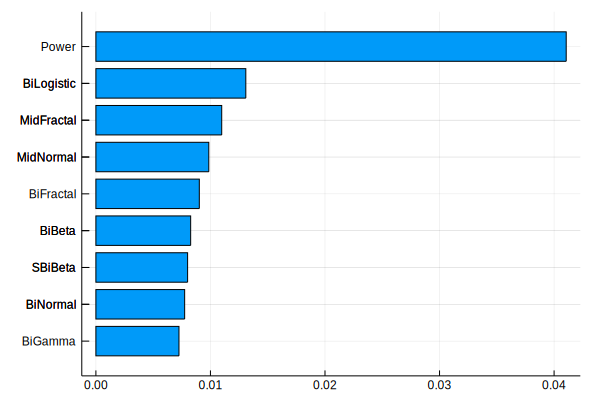

In [34]:
bar(df2.modelROC, df2.meanResult, orientation = :horizontal, label="")